In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from dect.ect import compute_ect_edges
from matplotlib.patches import Circle
import matplotlib.patches as patches
import ect # for figure illustrations we used ect package instead of dect

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
import networkx as nx

#### Euler Characteristic Transform Illustration, from Euler Characteristic of a static object, to its ECC and its ECT throgh different scales (for the ECC) and directions(for the ECT, as it is a combination of the ECC at different directions).

Finally not used in the paper, we just use directly from a molecule smile, as can be seen below.

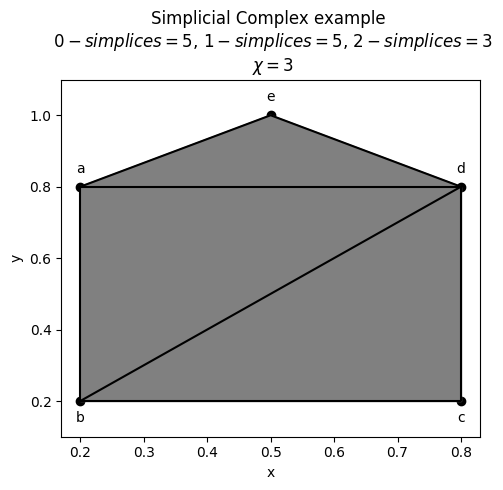

In [64]:
# simplicial complex example
points = np.array([[0.2, 0.8], [0.2, 0.2], [0.8, 0.2], [0.8, 0.8], [0.5, 1.0]])
vertex = ["a","b","c","d","e"]

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x=points[:,0],y=points[:,1], color='black')
ax.set_title("Simplicial Complex example \n $0-simplices = 5$, $1-simplices = 5$, $2-simplices = 3$ \n $\chi=3$")
for i in range(len(points)):
    offset = (0, -15) if i in [1, 2] else (0, 10) #points b and c annotated at bottom, others at top
    ax.annotate(vertex[i], (points[i,0], points[i,1]),xytext=offset, textcoords="offset points", ha='center')
ax.plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
ax.plot([points[0][0], points[1][0], points[2][0], points[3][0], points[0][0]], 
            [points[0][1], points[1][1], points[2][1], points[3][1], points[0][1]], color='black')
ax.plot([points[1][0], points[3][0]], [points[1][1], points[3][1]], color='black')
ax.add_patch(patches.Polygon([points[0], points[3], points[4]], closed=True, color='gray'))
ax.add_patch(patches.Polygon([points[1], points[2], points[3]], closed=True, color='gray'))
ax.add_patch(patches.Polygon([points[0], points[1], points[3]], closed=True, color='gray'))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim(0.1, 1.1)
plt.tight_layout()
plt.savefig('figures/IllustrationPaper/simplicialcomplex.png', dpi=300, bbox_inches='tight')
plt.show()


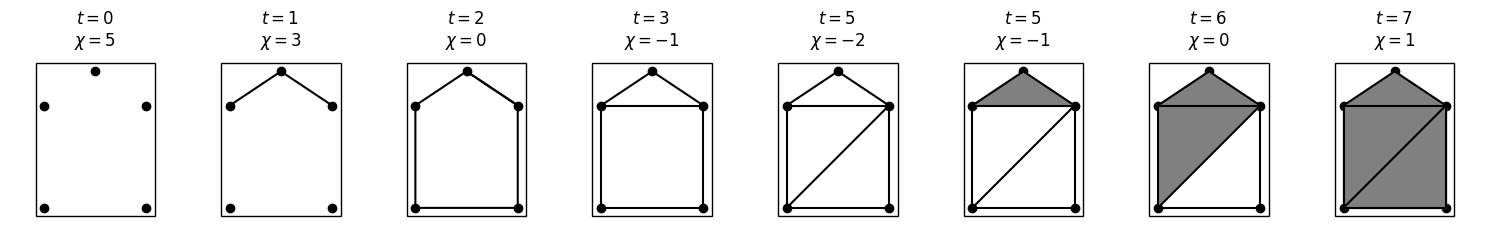

In [72]:
# filtration example
fig, axs = plt.subplots(1, 8, figsize=(15, 5))

# Definir las coordenadas de los puntos
points = np.array([[0.2, 0.8], [0.2, 0.2], [0.8, 0.2], [0.8, 0.8], [0.5, 1.0]])
vertex = ["a","b","c","d","e"]

# Paso 1: Solo los puntos
axs[0].scatter(*zip(*points), color='black')
axs[0].set_title("$t=0$ \n$\chi=5$")

# Paso 2: Agregar las líneas del techo
axs[1].scatter(*zip(*points), color='black')
axs[1].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
axs[1].set_title("$t=1$ \n$\chi=3$")

# Paso 3: Agregar el cuadrado base
axs[2].scatter(*zip(*points), color='black')
axs[2].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
axs[2].plot([points[0][0], points[1][0], points[2][0], points[3][0], points[4][0]], 
            [points[0][1], points[1][1], points[2][1], points[3][1], points[4][1]], color='black')
axs[2].set_title("$t=2$ \n$\chi=0$")
# Paso 4: Agregar línea horizontal
axs[3].scatter(*zip(*points), color='black')
axs[3].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
axs[3].plot([points[0][0], points[1][0], points[2][0], points[3][0], points[0][0]], 
            [points[0][1], points[1][1], points[2][1], points[3][1], points[0][1]], color='black')
axs[3].set_title("$t=3$ \n$\chi=-1$")
# Paso 5: Agregar una diagonal
axs[4].scatter(*zip(*points), color='black')
axs[4].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
axs[4].plot([points[0][0], points[1][0], points[2][0], points[3][0], points[0][0]], 
            [points[0][1], points[1][1], points[2][1], points[3][1], points[0][1]], color='black')
axs[4].plot([points[1][0], points[3][0]], [points[1][1], points[3][1]], color='black')
axs[4].set_title("$t=5$ \n$\chi=-2$")
# Paso 6: Sombrear el techo
axs[5].scatter(*zip(*points), color='black')
axs[5].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
axs[5].plot([points[0][0], points[1][0], points[2][0], points[3][0], points[0][0]], 
            [points[0][1], points[1][1], points[2][1], points[3][1], points[0][1]], color='black')
axs[5].plot([points[1][0], points[3][0]], [points[1][1], points[3][1]], color='black')
axs[5].add_patch(patches.Polygon([points[0], points[3], points[4]], closed=True, color='gray'))
axs[5].set_title("$t=5$ \n$\chi=-1$")
# Paso 7: Sombrear una parte del cuadrado
axs[6].scatter(*zip(*points), color='black')
axs[6].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
axs[6].plot([points[0][0], points[1][0], points[2][0], points[3][0], points[0][0]], 
            [points[0][1], points[1][1], points[2][1], points[3][1], points[0][1]], color='black')
axs[6].plot([points[1][0], points[3][0]], [points[1][1], points[3][1]], color='black')
axs[6].add_patch(patches.Polygon([points[0], points[3], points[4]], closed=True, color='gray'))
axs[6].add_patch(patches.Polygon([points[0], points[1], points[3]], closed=True, color='gray'))
axs[6].set_title("$t=6$ \n$\chi=0$")
# Paso 8: Sombrear el área total
axs[7].scatter(*zip(*points), color='black')
axs[7].plot([points[0][0], points[4][0], points[3][0]], [points[0][1], points[4][1], points[3][1]], color='black')
axs[7].plot([points[0][0], points[1][0], points[2][0], points[3][0], points[0][0]], 
            [points[0][1], points[1][1], points[2][1], points[3][1], points[0][1]], color='black')
axs[7].plot([points[1][0], points[3][0]], [points[1][1], points[3][1]], color='black')
axs[7].add_patch(patches.Polygon([points[0], points[3], points[4]], closed=True, color='gray'))
axs[7].add_patch(patches.Polygon([points[1], points[2], points[3]], closed=True, color='gray'))
axs[7].add_patch(patches.Polygon([points[0], points[1], points[3]], closed=True, color='gray'))
axs[7].set_title("$t=7$ \n$\chi=1$")
for ax in axs:
    ax.axis('off')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.1)
    ax.set_aspect('equal')
    ax.add_patch(patches.Rectangle((0.15, 0.15), 0.7, 0.9, edgecolor='black', fill=False))

# plt.suptitle("Filtration example")
plt.tight_layout()
plt.savefig('figures/IllustrationPaper/Filtration.png', dpi=300, bbox_inches='tight')
plt.show()


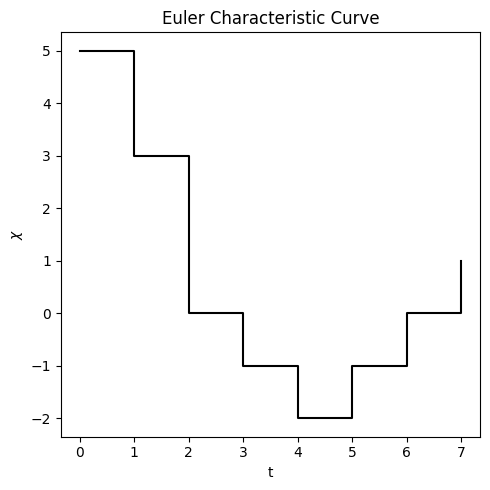

In [71]:
#euler characteristic curve example
ecc = np.array([5,3,0,-1,-2,-1,0,1])
plt.figure(figsize=(5, 5))
plt.step(range(len(ecc)), ecc, where='post', color='black')
plt.title("Euler Characteristic Curve")
plt.xlabel("t")
plt.ylabel("$\chi$")
plt.tight_layout()
plt.savefig('figures/IllustrationPaper/ECCexample.png', dpi=300, bbox_inches='tight')
plt.show()

#### Euler Characteristic Transform illustration from molecule smile.

In this case, we use as an example the [acetic acid](https://en.wikipedia.org/wiki/Acetic_acid) molecule and its smile, which it is CC(O)=O. You can use as tutorial for the ECT and this plots, the following repository I made: https://github.com/victosdur/EulerCharacteristicTransform_Tutorial/blob/main/ect/tutorial.ipynb

Atom info:
Atom 0: {'symbol': 'C', 'atomic_num': 6, 'is_aromatic': False}
Atom 1: {'symbol': 'C', 'atomic_num': 6, 'is_aromatic': False}
Atom 2: {'symbol': 'O', 'atomic_num': 8, 'is_aromatic': False}
Atom 3: {'symbol': 'O', 'atomic_num': 8, 'is_aromatic': False}
Atom 4: {'symbol': 'H', 'atomic_num': 1, 'is_aromatic': False}
Atom 5: {'symbol': 'H', 'atomic_num': 1, 'is_aromatic': False}
Atom 6: {'symbol': 'H', 'atomic_num': 1, 'is_aromatic': False}
Atom 7: {'symbol': 'H', 'atomic_num': 1, 'is_aromatic': False}


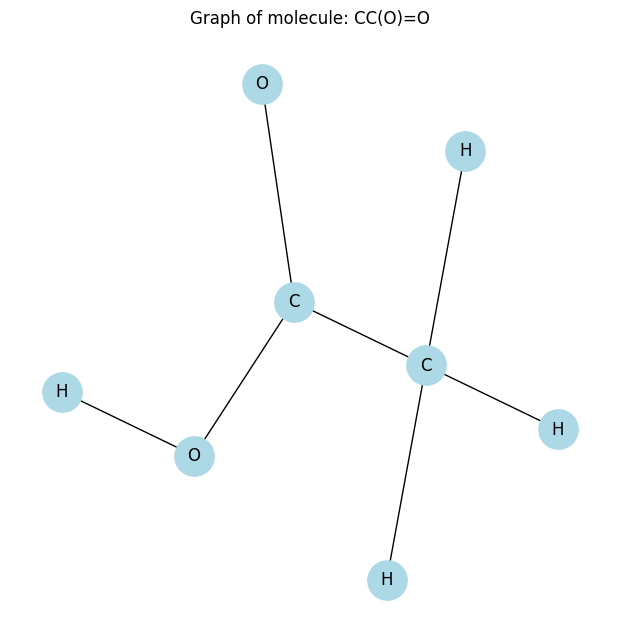

In [ ]:
aceticAcidSmile = "CC(O)=O"

# Convert SMILES to RDKit molecule object
mol = Chem.MolFromSmiles(aceticAcidSmile)
mol = Chem.AddHs(mol)  # Add hydrogens if desired

# Compute 2D coordinates (always the same with same seed, for molecule visualization is super nice)
rdDepictor.Compute2DCoords(mol)

# Access node (atom) information
atom_info = {}
for atom in mol.GetAtoms():
    idx = atom.GetIdx()
    atom_info[idx] = {
        "symbol": atom.GetSymbol(),
        "atomic_num": atom.GetAtomicNum(),
        "is_aromatic": atom.GetIsAromatic(),
    }

# In case you want to see the atom information
# print("Atom info:")
# for idx, info in atom_info.items():
#     print(f"Atom {idx}: {info}")

# Build molecule graph with NetworkX
G = nx.Graph()
for atom in mol.GetAtoms():
    idx = atom.GetIdx()
    G.add_node(idx, **atom_info[idx])

for bond in mol.GetBonds():
    start = bond.GetBeginAtomIdx()
    end = bond.GetEndAtomIdx()
    G.add_edge(start, end, bond_type=str(bond.GetBondType()))

# Get 2D coordinates for layout
conf = mol.GetConformer()
pos = {i: (conf.GetAtomPosition(i).x, conf.GetAtomPosition(i).y) for i in range(mol.GetNumAtoms())}

# Plot the molecular graph
plt.figure(figsize=(6, 6))
nx.draw(G, pos, node_color='lightblue', node_size=800, font_size=10)
nx.draw_networkx_labels(G, pos, labels={atom.GetIdx(): atom.GetSymbol() for atom in mol.GetAtoms()}, font_color='black')
plt.title(f"Graph of molecule: {aceticAcidSmile}")
plt.axis('off')
plt.show()

In [140]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7))